In [1]:
import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random

In [2]:
# Taken from https://pytorch.org/tutorials/beginner/nn_tutorial.html
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [3]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        mnist = pickle.load(f, encoding="latin-1")

In [4]:
(training, validation, test) = mnist

In [5]:
x_train, y_train = torch.tensor(training[0]), torch.tensor(training[1])
x_val, y_val = torch.tensor(validation[0]), torch.tensor(validation[1])
x_test, y_test = torch.tensor(test[0]), torch.tensor(test[1])

In [6]:
# Plot an image
def image(im, x, y):
    img = np.reshape(im, (x, y))
    imgplot = plt.imshow(img, cmap = "gray")
    plt.show()

In [7]:
# Get a random image
def traindata(t):
    x = random.randint(0, 49999)
    return t[0][x]

In [8]:
# Find maximum value from a list
def Max(l):
    m = l[0]
    for i in l:
        if m < i:
            m = i
    return m

In [9]:
# Max pool with 2x2 filter and stride 2
def MaxPool2(img, img_x, img_y):
    img = np.reshape(img, (img_x, img_y))
    fin_x = img_x//2
    fin_y = img_y//2
    fin = np.zeros((fin_x, fin_y))
    for i in range(0, fin_x):
        for j in range(0, fin_y):
            fin[i][j] = Max([img[i*2][j*2], img[i*2][j*2 + 1], img[i*2 + 1][j*2], img[i*2 + 1][j*2 + 1]])
    fin = np.reshape(fin, (fin_x * fin_y,))
    return fin

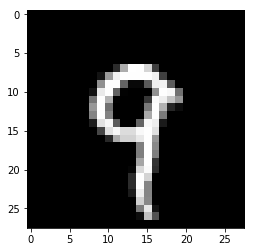

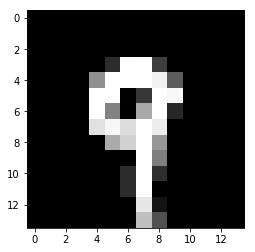

In [10]:
x = traindata(training)
image(x, 28, 28)
image(MaxPool2(x, 28, 28), 14, 14)

In [11]:
# Calculate average value from a list.
def Avg(l):
    sum = 0
    for i in l:
        sum = sum + i
    avg = sum/len(l)
    return avg

In [12]:
# Average pool with 2x2 filter and stride 2
def AvgPool2(img, img_x, img_y):
    img = np.reshape(img, (img_x, img_y))
    fin_x = img_x//2
    fin_y = img_y//2
    fin = np.zeros((fin_x, fin_y))
    for i in range(0, fin_x):
        for j in range(0, fin_y):
            fin[i][j] = Avg([img[i*2][j*2], img[i*2][j*2 + 1], img[i*2 + 1][j*2], img[i*2 + 1][j*2 + 1]])
    fin = np.reshape(fin, (fin_x * fin_y,))
    return fin

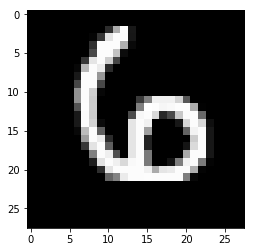

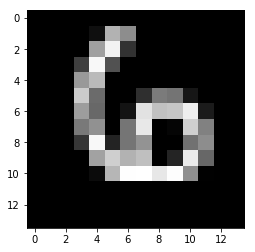

In [13]:
x = traindata(training)
image(x, 28, 28)
image(AvgPool2(x, 28, 28), 14, 14)

In [14]:
# Convolution using 3x3 Kernel and stride 1.
def Conv(img, img_x, img_y, K):
    img = np.reshape(img, (img_x, img_y))
    fin_x = img_x - 2
    fin_y = img_y - 2
    fin = np.zeros((fin_x, fin_y))
    for i in range(0, fin_x):
        for j in range(0, fin_y):
            fin[i][j] = K[0][0]*img[i][j] + K[0][1]*img[i][j + 1] + K[0][2]*img[i][j + 2] + K[1][0]*img[i + 1][j] + K[1][1]*img[i + 1][j + 1] + K[1][2]*img[i + 1][j+2] + K[2][0]*img[i + 2][j] + K[2][1]*img[i + 2][j + 1] + K[2][2]*img[i + 2][j + 2]
    fin = np.reshape(fin, (fin_x * fin_y,))
    return fin

In [15]:
# Implement ReLU for a list of numbers.
def ReLU(a):
    for i in range(0, len(a)):
        if a[i] < 0:
            a[i] = 0
    return a

Original image.


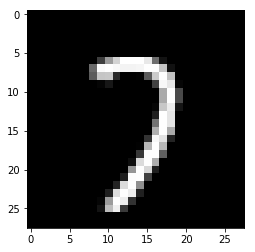

In [16]:
x = traindata(training)
print("Original image.")
image(x, 28, 28)
# Edge detection Kernels in https://en.wikipedia.org/wiki/Kernel_(image_processing)
K1 = [[1, 0, -1], [0, 0, 0], [-1, 0, 1]]
K2 = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
K3 = [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]

Conv image.


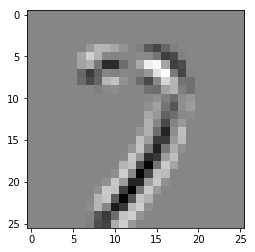

Conv with ReLU image.


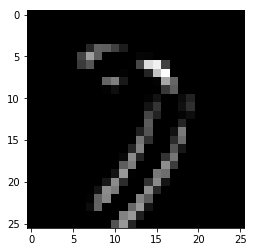

In [17]:
conv = Conv(x, 28, 28, K1)
print("Conv image.")
image(conv, 26, 26)
print("Conv with ReLU image.")
image(ReLU(conv), 26, 26)

Conv image.


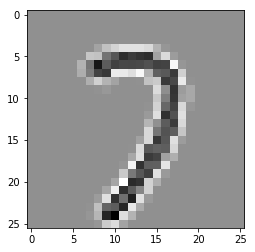

Conv with ReLU image.


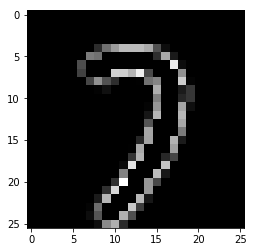

In [18]:
conv = Conv(x, 28, 28, K2)
print("Conv image.")
image(conv, 26, 26)
print("Conv with ReLU image.")
image(ReLU(conv), 26, 26)

Conv image.


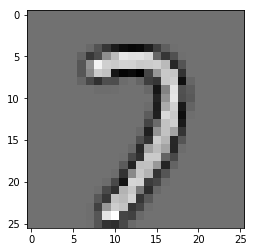

Conv with ReLU image.


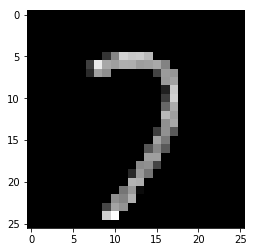

In [19]:
conv = Conv(x, 28, 28, K3)
print("Conv image.")
image(conv, 26, 26)
print("Conv with ReLU image.")
image(ReLU(conv), 26, 26)